<a href="https://colab.research.google.com/github/IsWallison/Predictive-Analytics-Life-Insurance/blob/main/Copy_of_%5BPROJETO%5D_Regress%C3%A3o_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**


---

# PROJETO REGRESSÃO

Como falamos antes, nossos templates ficarão cada vez mais simples!!

O objetivo deste projeto é desenvolver um projeto de Regressão para prever o custo do Seguro de Vida, com [esses dados do Kaggle](https://www.kaggle.com/annetxu/health-insurance-cost-prediction).

Aqui, queremos, como sempre, trazer o máximo de autonomia e independência pra vocês. Façam o download, e disponibilizem os seus dados, carreguem eles aqui, e desenvolvam o projeto.

## Objetivos

* Adquirir e disponibilizar os dados
* Análise completa dos dados e do problema (Na mão, ou com Pandas Profiling, SweetViz, etc)
* Desenvolver uma solução de Machine Learning eficiente com PyCaret para Regressão

LEMBREM-SE: Documentação, Storytelling, Artigo com Código! 

Mãos à obra e boa sorte!


In [1]:
!pip install schemdraw==0.15
!pip install pycaret

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pycaret.utils import version
from pycaret.regression import *

from sklearn.model_selection import train_test_split


In [116]:
df =  pd.read_csv('https://raw.githubusercontent.com/IsWallison/Predictive-Analytics-Life-Insurance/main/insurance.csv')
df_clean = df.copy()
df_clean.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df_clean.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df_clean.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


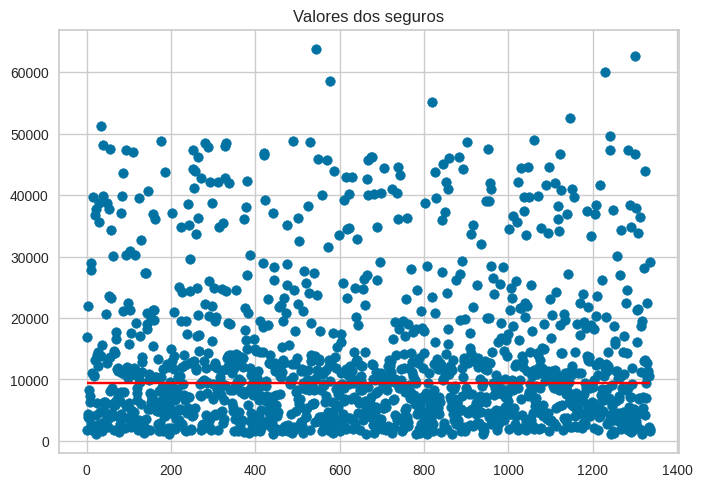

In [10]:
fig, ax = plt.subplots();
metade_valores = df['expenses'].median()
x_ini = df.index.min()
x_final = df.index.max()

ax.scatter(y=df['expenses'],x=df.index)
ax.set_title('Valores dos seguros');
ax.set_ylabel('')
ax.hlines(y=metade_valores, xmin=x_ini, xmax=x_final,color='red',)
plt.show()

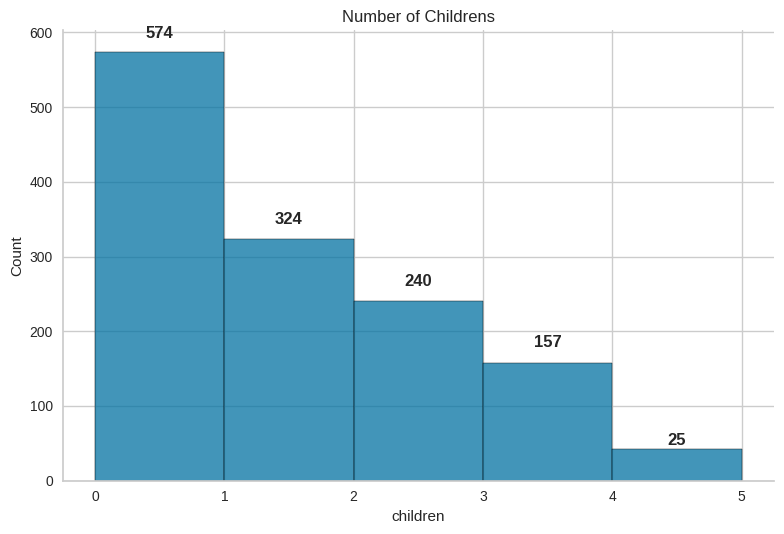

In [11]:
fig, ax = plt.subplots();

sns.histplot(x=df_clean['children'], binwidth=1)
ax.set_title('Number of Childrens');
total_children = df_clean['children'].value_counts()

def remove_spine(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

for i in range(5):
  alt = int(total_children[i])+25
  ax.text(i+0.5, i+alt, total_children[i], va='center', ha='center', fontweight='bold',)

remove_spine(ax)
plt.tight_layout()
plt.show()

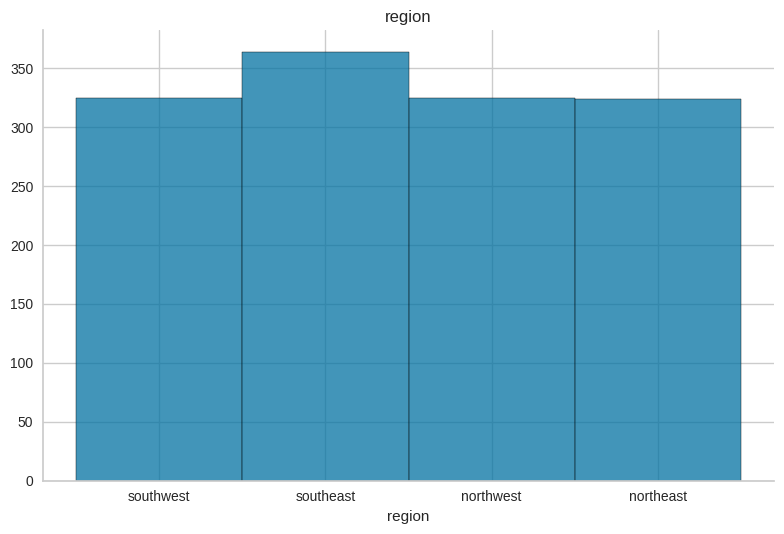

In [12]:
fig, ax = plt.subplots();

sns.histplot(x=df_clean['region'])
ax.set_title('region');
ax.set_ylabel('')
total_children = df_clean['region'].value_counts()


remove_spine(ax)
plt.tight_layout()
plt.show()

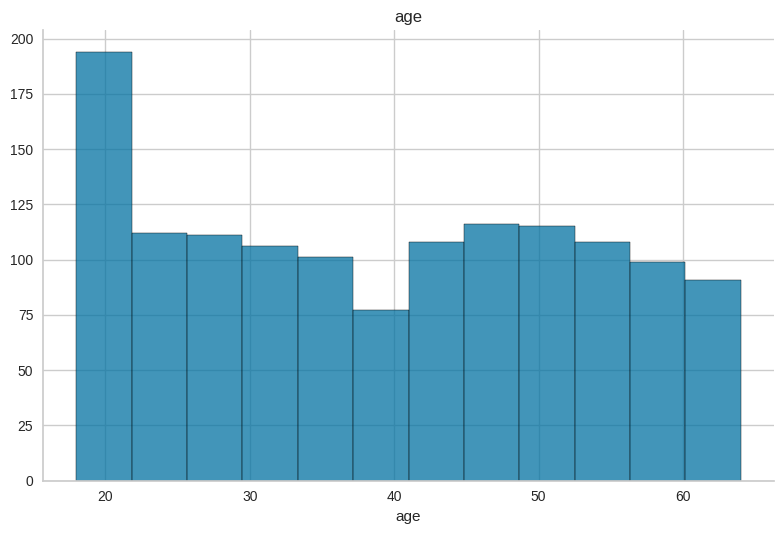

In [13]:
fig, ax = plt.subplots();

sns.histplot(x=df_clean['age'])
ax.set_title('age');
ax.set_ylabel('')

remove_spine(ax)
plt.tight_layout()
plt.show()

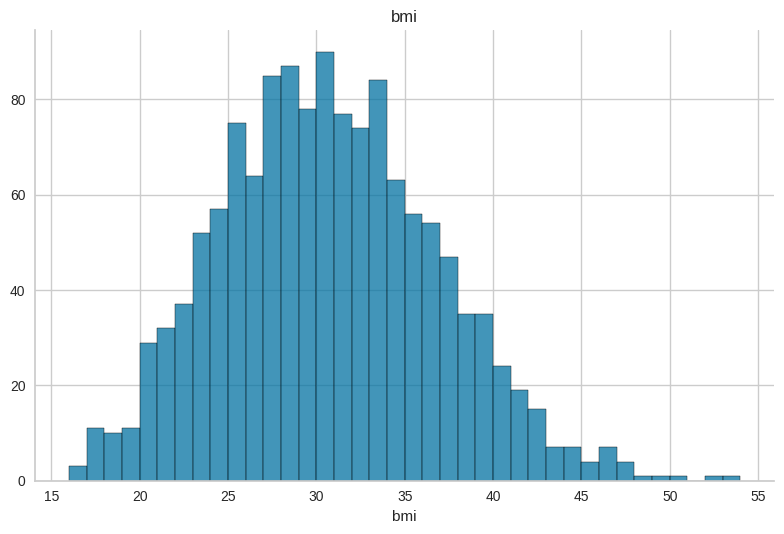

In [14]:
fig, ax = plt.subplots();

sns.histplot(x=df_clean['bmi'],binwidth=1)
ax.set_title('bmi');
ax.set_ylabel('')

remove_spine(ax)
plt.tight_layout()
plt.show()


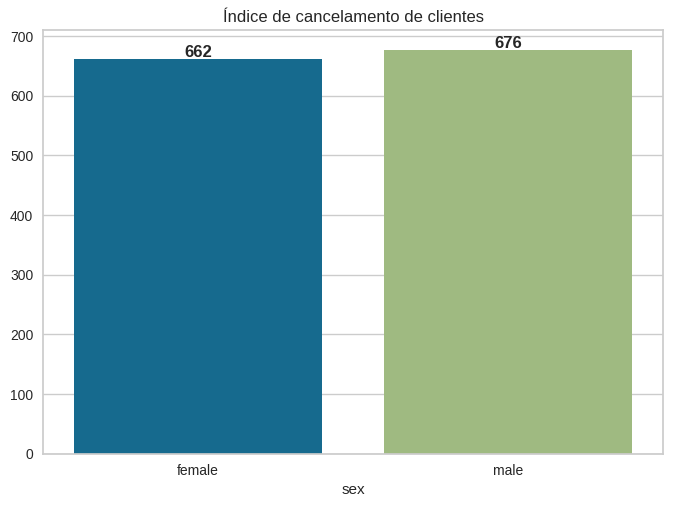

In [15]:
fig, ax = plt.subplots();
sns.countplot(x=df_clean['sex'],)
ax.set_title('Índice de cancelamento de clientes');
ax.set_ylabel('')
total_sex = df_clean['sex'].value_counts(ascending=True)

for i in range(2):
  alt = int(total_sex[i]+10)
  ax.text(i, i+alt, total_sex[i], va='center', ha='center', fontweight='bold',)


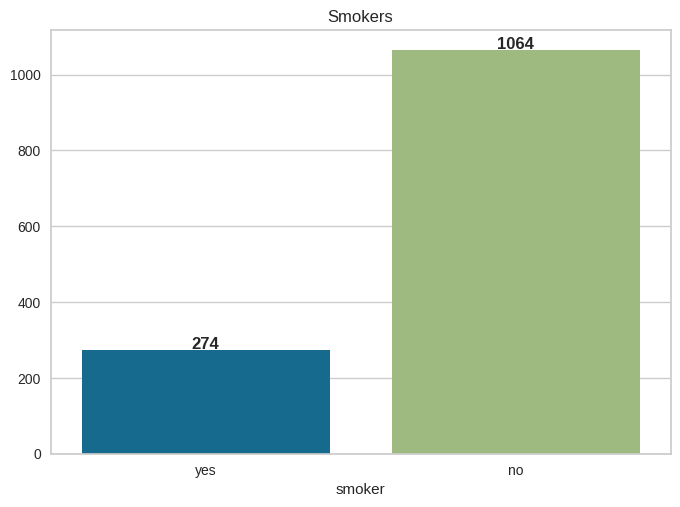

In [16]:
fig, ax = plt.subplots();
sns.countplot(x=df_clean['smoker'])
ax.set_title('Smokers');
ax.set_ylabel('')
total_sex = df_clean['smoker'].value_counts(ascending=True)

for i in range(2):
  alt = int(total_sex[i]+15)
  ax.text(i, i+alt, total_sex[i], va='center', ha='center', fontweight='bold',)

In [111]:
df_clean['sex'] = (df_clean['sex']=='male').astype(int)
df_clean['smoker'] = (df_clean['smoker']=='yes').astype(int)
df_clean.head()

,age,sex,bmi,children,smoker,expenses
0,19,0,27.9,0,0,16884.92
1,18,0,33.8,1,0,1725.55
2,28,0,33.0,3,0,4449.46
3,33,0,22.7,0,0,21984.47
4,32,0,28.9,0,0,3866.86


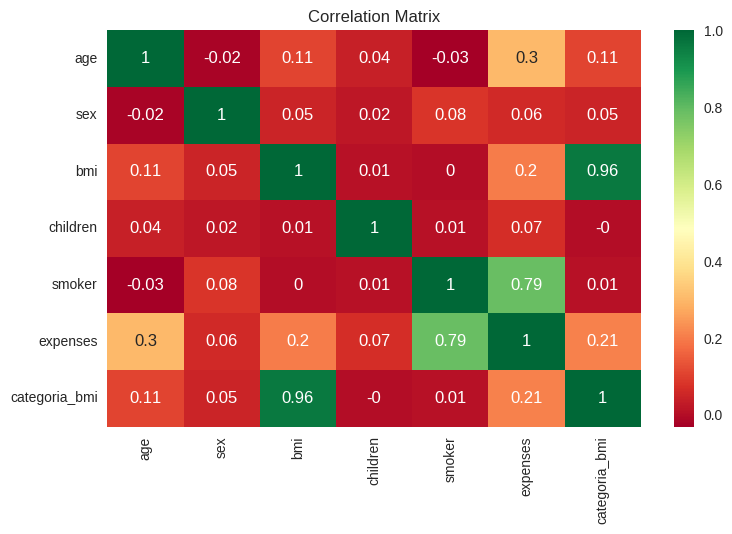

In [60]:
corr = df_clean.corr()
corr= corr.round(2)

# Create a figure and an Axes object
fig, ax = plt.subplots()

# Plot the heatmap
sns.heatmap(corr, cmap='RdYlGn', annot=True, ax=ax,)

# Set the title
ax.set_title("Correlation Matrix")

# Show the plot
plt.tight_layout()
plt.show()

In [117]:
train, test = train_test_split(df_clean, test_size=0.3, random_state=42)


# Exibir o tamanho dos conjuntos de treinamento e teste
print('Train:', train.shape)
print('Test:', test.shape)
train.head()

Train: (936, 7)
Test: (402, 7)


,age,sex,bmi,children,smoker,region,expenses
332,61,female,31.2,0,no,northwest,13429.04
355,46,male,27.6,0,no,southwest,24603.05
138,54,female,31.9,3,no,southeast,27322.73
381,55,male,30.7,0,yes,northeast,42303.69
292,25,male,45.5,2,yes,southeast,42112.24


In [118]:
s = setup(data=train,target = 'expenses')

,Description,Value
0,Session id,1873
1,Target,expenses
2,Target type,Regression
3,Original data shape,"(936, 7)"
4,Transformed data shape,"(936, 10)"
5,Transformed train set shape,"(655, 10)"
6,Transformed test set shape,"(281, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [119]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2904.0018,24977463.4893,4920.2473,0.8225,0.4627,0.3286,0.7450
lightgbm,Light Gradient Boosting Machine,3161.0011,27029170.7042,5138.9136,0.8065,0.5731,0.3831,0.3850
rf,Random Forest Regressor,3031.9401,27358881.2567,5166.0470,0.8065,0.4856,0.3487,0.8090
ada,AdaBoost Regressor,4181.4214,28705547.6548,5324.1394,0.7957,0.6148,0.6887,0.3320
et,Extra Trees Regressor,3016.2447,29385902.2686,5370.4845,0.7899,0.4855,0.3513,0.7380
xgboost,Extreme Gradient Boosting,3364.7416,32199543.0000,5590.4833,0.7703,0.6059,0.3979,0.4070
ridge,Ridge Regression,4349.5815,38464456.1199,6150.6857,0.7291,0.5667,0.4431,0.3020
br,Bayesian Ridge,4340.5818,38460734.1599,6150.6037,0.7290,0.5683,0.4414,0.5670
lar,Least Angle Regression,4329.9100,38458910.7986,6150.6627,0.7289,0.5711,0.4395,0.5000
llar,Lasso Least Angle Regression,4329.8132,38454592.3759,6150.3044,0.7289,0.5706,0.4395,0.3130


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [120]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

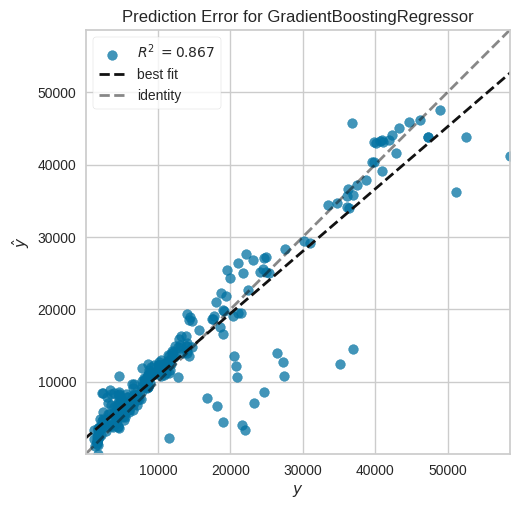

In [121]:
plot_model(best, plot='error')

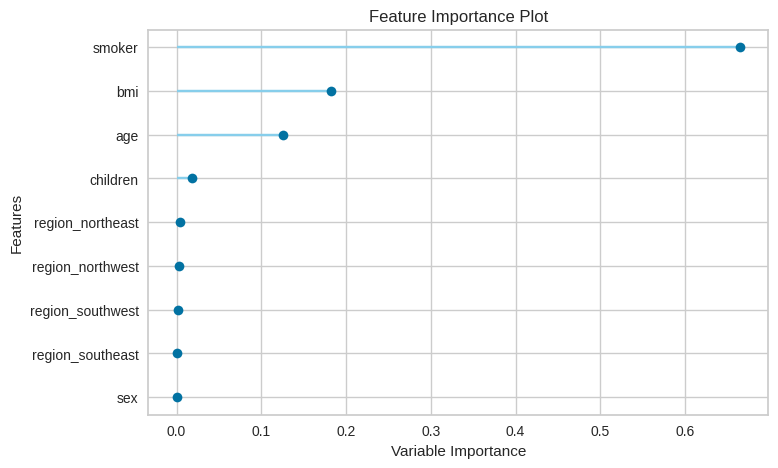

In [122]:
plot_model(best, plot='feature')

In [123]:
pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2558.9023,19337945.0332,4397.4930,0.8668,0.4559,0.3045


In [129]:
unseen_predictions = predict_model(best,data=df_clean,)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2385.6980,17053939.3801,4129.6416,0.8836,0.4097,0.2881


,age,sex,bmi,children,smoker,region,expenses,prediction_label
0,19,female,27.900000,0,yes,southwest,16884.919922,17492.386830
1,18,male,33.799999,1,no,southeast,1725.550049,4041.866717
2,28,male,33.000000,3,no,southeast,4449.459961,6930.358459
3,33,male,22.700001,0,no,northwest,21984.470703,3280.494577
4,32,male,28.900000,0,no,northwest,3866.860107,3547.805656


In [ ]:
pred = predict_model(best,data=test)